## 1. Data load

In [2]:
import pandas as pd
import numpy as np

train = pd.read_excel("data/train1.xlsx")

print("Shape:", train.shape)
train.head()


# Preprocessing

import numpy as np
train = train.dropna()
train['price_log'] = np.log1p(train['price'])
train.head()

Shape: (16209, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,1810,0,1961,0,98055,47.4362,-122.187,1660,9240,12.501142
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,1600,0,1992,0,98031,47.4034,-122.187,1720,3605,12.409018
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,1720,0,1994,0,98003,47.2704,-122.313,1870,7455,12.206078
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,1150,90,2009,0,98027,47.5321,-122.073,1240,750,12.772806
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,1280,0,1994,0,98042,47.3715,-122.074,1590,8071,12.354497


In [3]:
# Check for missing values

train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price_log        0
dtype: int64

Report
    
    The dataset contains structured housing attributes along with geographical coordinates.
    No significant missing values were observed, ensuring reliable downstream modeling.

## 2. Target variable (Price) analysis

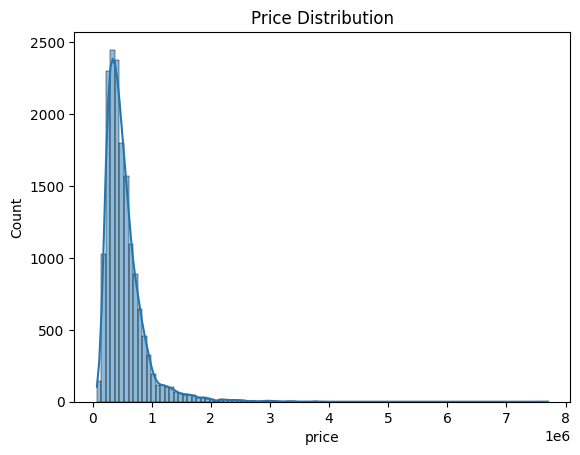

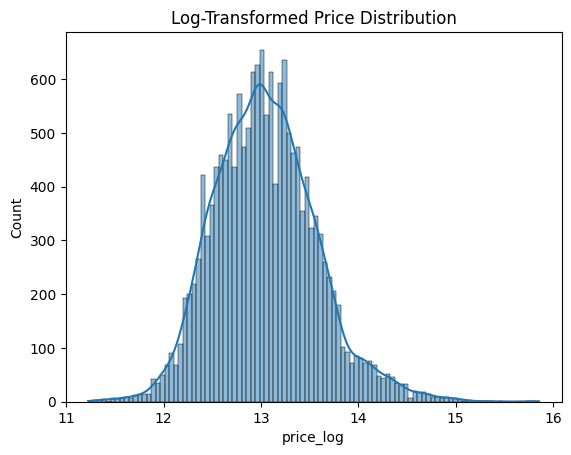

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Original Price Distribution
sns.histplot(train["price"], bins=100, kde=True)
plt.title("Price Distribution")
plt.show()

# Log-Transformation
sns.histplot(train["price_log"], bins=100, kde=True)
plt.title("Log-Transformed Price Distribution")   
plt.show()

Report

    Property prices exhibit a strong right-skew, indicating the presence of high-value outliers.
    A log transformation significantly normalizes the distribution, improving regression stability.

## 3. Univariate Feature Analysis

#### 3.(a) Histogram plots

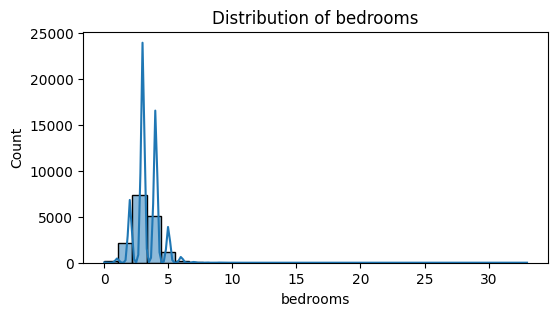

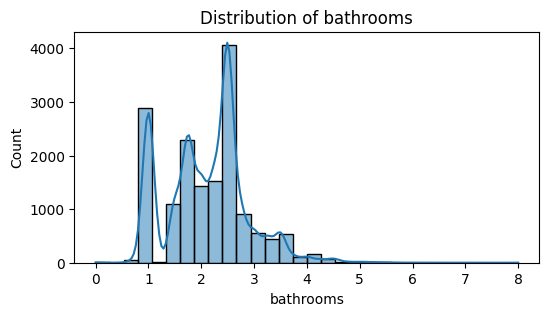

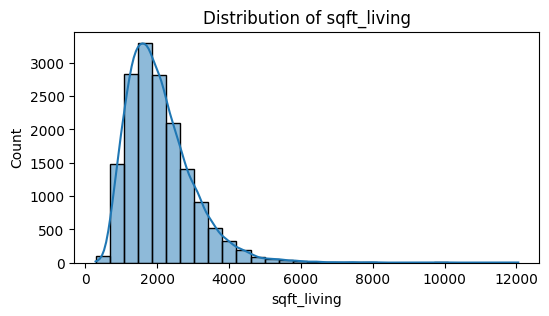

In [5]:
features = ["bedrooms", "bathrooms", "sqft_living"]

for col in features:
    plt.figure(figsize=(6,3))
    sns.histplot(train[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Report

    1. Bedrooms & bathrooms are discrete
    2. Sqft is continuous and right-skewed

#### 3.(b) Box plot

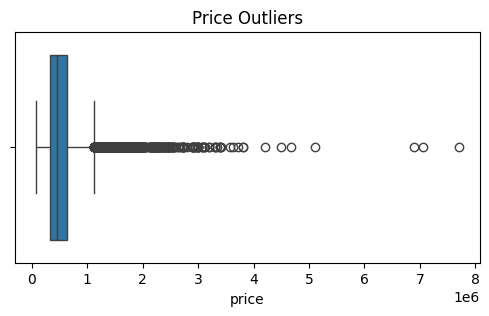

In [6]:
plt.figure(figsize=(6,3))
sns.boxplot(x=train["price"])
plt.title("Price Outliers")
plt.show()


Report

    Extreme outliers justify the use of log-transformation and robust loss functions.

## 4. Bivariate Analysis (Features vs Price)

#### 4.(a) Scatterplot relationship

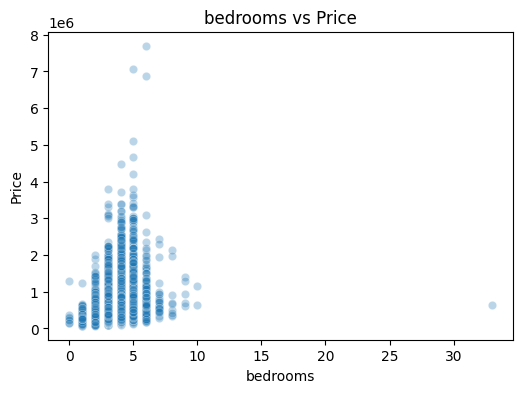

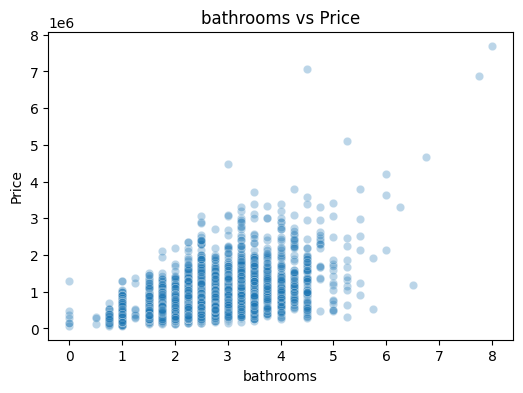

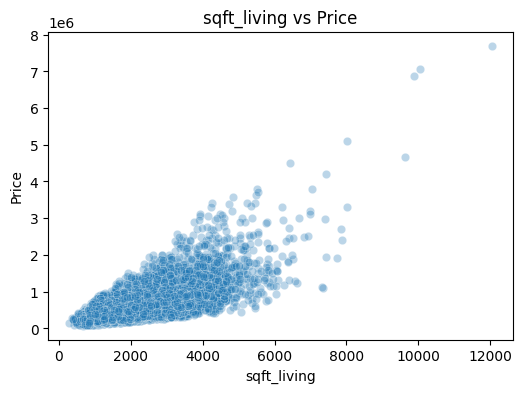

In [7]:
for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train[col], y=train["price"], alpha=0.3)
    plt.title(f"{col} vs Price")
    plt.ylabel("Price")
    plt.show()


#### 4.(b) Correlation heatmap

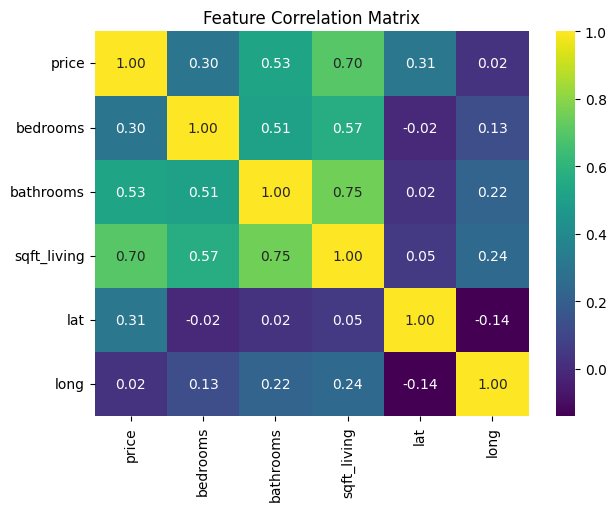

In [8]:
plt.figure(figsize=(7,5))
corr = train[["price", "bedrooms", "bathrooms", "sqft_living", "lat", "long"]].corr()
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


Report

    1. Sqft_living has the strongest correlation with price
    2. Location (lat/long) shows meaningful influence
    3. Bedrooms alone are weaker than size

## 5. Geospatial Analysis

#### 5.(a) Price by geography

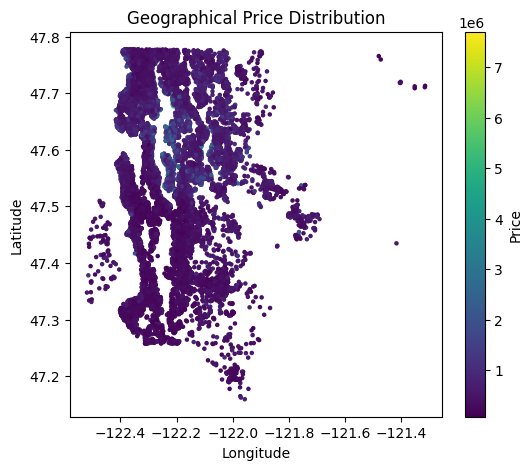

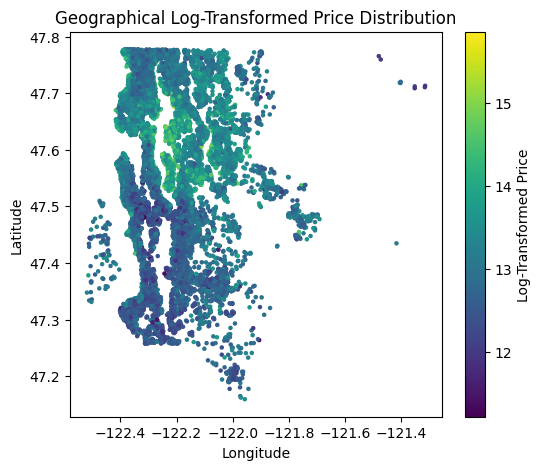

In [9]:
# Geo price map

# Geographical Price Distribution
plt.figure(figsize=(6,5))
plt.scatter(train["long"], train["lat"], c=train["price"], cmap="viridis", s=5)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Price Distribution")
plt.show()

# Geographical Log-Transformed Price Distribution
plt.figure(figsize=(6,5))
plt.scatter(train["long"], train["lat"], c=train["price_log"], cmap="viridis", s=5)
plt.colorbar(label="Log-Transformed Price")     
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Log-Transformed Price Distribution")
plt.show()

#### 5.(b) Price density

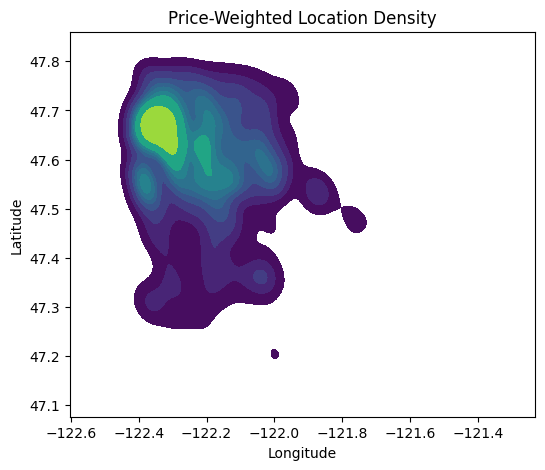

In [10]:
plt.figure(figsize=(6,5))
sns.kdeplot(x=train["long"], y=train["lat"], weights=train["price"], cmap="viridis", fill=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Price-Weighted Location Density")
plt.show()


Report
   
    Clear spatial clustering of high-value properties suggests strong neighborhood effects, motivating the use of satellite imagery to capture visual context.

## 6. Satellite Image Analysis

#### 6.(a) Compare cheap vs expensive properties

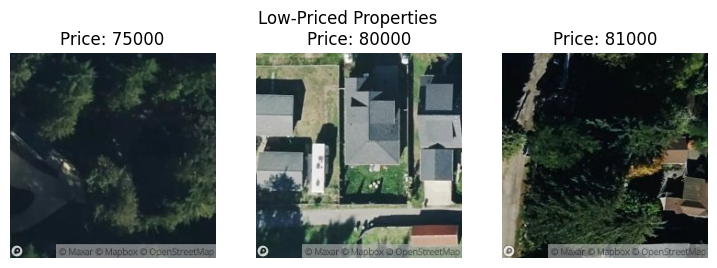

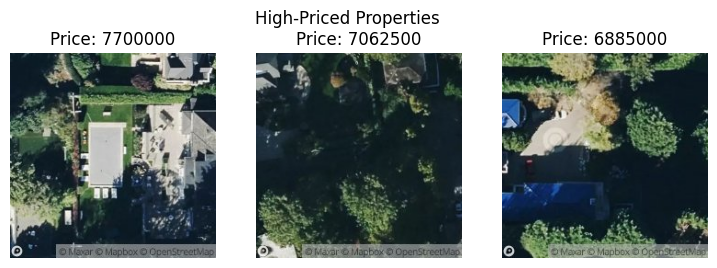

In [11]:
from PIL import Image

cheap = train.nsmallest(3, "price")
expensive = train.nlargest(3, "price")

def show_images(df, title):
    plt.figure(figsize=(9,3))
    for i, (_, row) in enumerate(df.iterrows()):
        img = Image.open(f"data/images/train/{row['id']}.png")
        plt.subplot(1,3,i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Price: {int(row['price'])}")
    plt.suptitle(title)
    plt.show()

show_images(cheap, "Low-Priced Properties")
show_images(expensive, "High-Priced Properties")


Report

    High-priced properties exhibit greater green cover, structured road networks, and lower congestion, while low-priced properties show denser layouts and reduced vegetation.

#### 6.(b) Price based Image Stratification

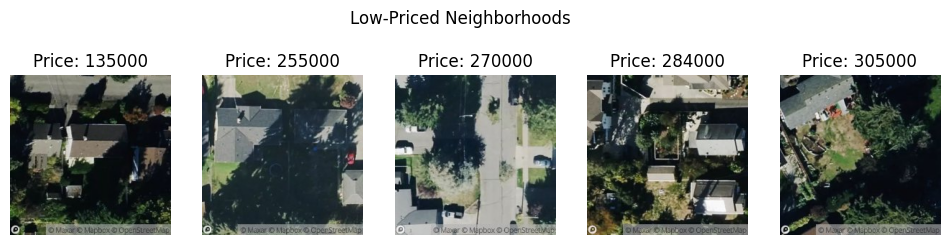

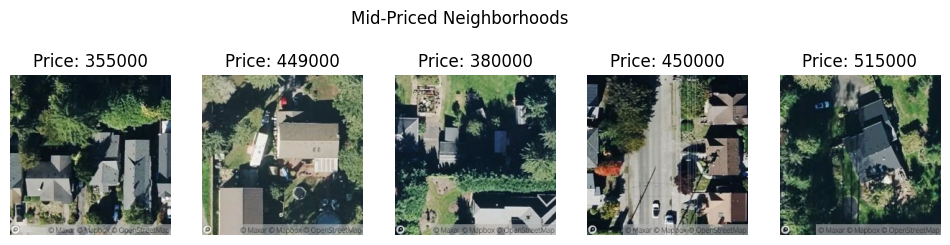

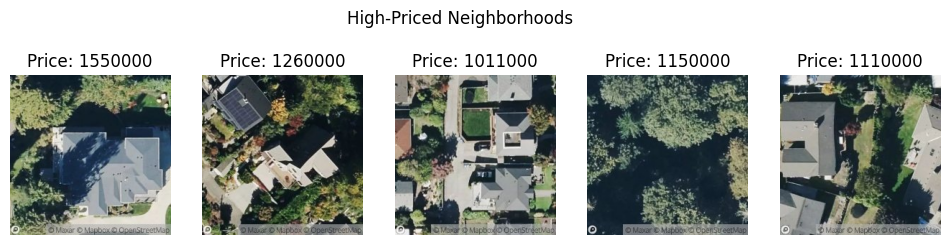

In [12]:
# Create price groups

low = train[train["price"] <= train["price"].quantile(0.25)]
mid = train[
    (train["price"] > train["price"].quantile(0.25)) &
    (train["price"] < train["price"].quantile(0.75))
]
high = train[train["price"] >= train["price"].quantile(0.75)]


# Visual Comparison of Price Groups

def show_group_images(df, title, n=5):
    plt.figure(figsize=(12,3))
    for i, (_, row) in enumerate(df.sample(n).iterrows()):
        img = Image.open(f"data/images/train/{row['id']}.png")
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"Price: {int(row['price'])}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_group_images(low, "Low-Priced Neighborhoods")
show_group_images(mid, "Mid-Priced Neighborhoods")
show_group_images(high, "High-Priced Neighborhoods")


Report

    Low-priced properties are associated with dense and irregular urban layouts with limited green cover, whereas high-priced properties are situated in more spacious, well-planned neighborhoods characterized by wider roads and abundant vegetation.

#### 6.(c) Green Cover Analysis

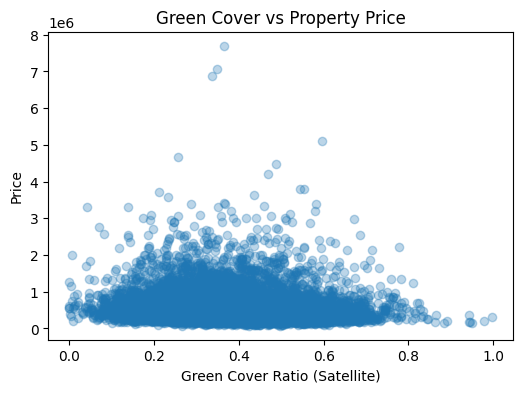

In [13]:
# Extract green ratio from each image
# Extract green ratio from each image
import cv2

def green_ratio(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    green = img[:,:,1]
    red = img[:,:,0]
    blue = img[:,:,2]

    green_pixels = green > red
    green_pixels &= green > blue

    return green_pixels.mean()


# Compute green ratio per property

train["green_ratio"] = train["id"].apply(
    lambda x: green_ratio(f"data/images/train/{x}.png")
)


# Compare green ratio vs price

plt.figure(figsize=(6,4))
plt.scatter(train["green_ratio"], train["price"], alpha=0.3)
plt.xlabel("Green Cover Ratio (Satellite)")
plt.ylabel("Price")
plt.title("Green Cover vs Property Price")
plt.show()


Report 

    Properties with higher prices tend to be surrounded by a greater proportion of green cover, confirming that environmental quality plays a significant role in valuation.

#### 6.(d) Brightness and Urban Density Analysis

In [15]:
# Average Brightness

def brightness(image_path):
    img = cv2.imread(image_path, 0)  # grayscale
    return img.mean()

train["brightness"] = train["id"].apply(
    lambda x: brightness(f"data/images/train/{x}.png")
)


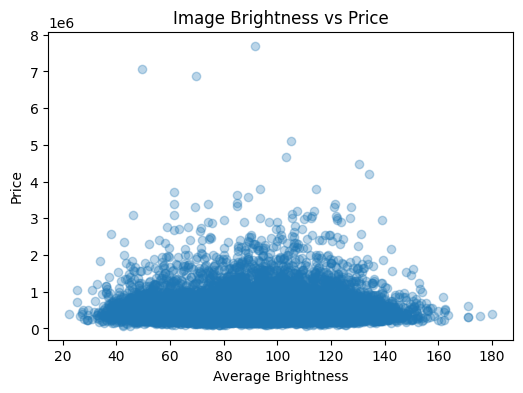

In [16]:
# Brightness vs Price plot

plt.figure(figsize=(6,4))
plt.scatter(train["brightness"], train["price"], alpha=0.3)
plt.xlabel("Average Brightness")
plt.ylabel("Price")
plt.title("Image Brightness vs Price")
plt.show()


Report

    The scatter plot of average satellite image brightness versus property price reveals no strong linear correlation, indicating that brightness alone is insufficient to explain price variations. However, extremely low-brightness regions rarely contain high-value properties, while higher-priced properties tend to appear within a moderate brightness range. This suggests that visual context contributes to valuation in a non-linear manner and must be captured through richer spatial features rather than simple global statistics. These observations motivate the use of convolutional neural networks to automatically learn complex neighborhood-level representations from satellite imagery.

#### 6.(e) Boxplots by Price group

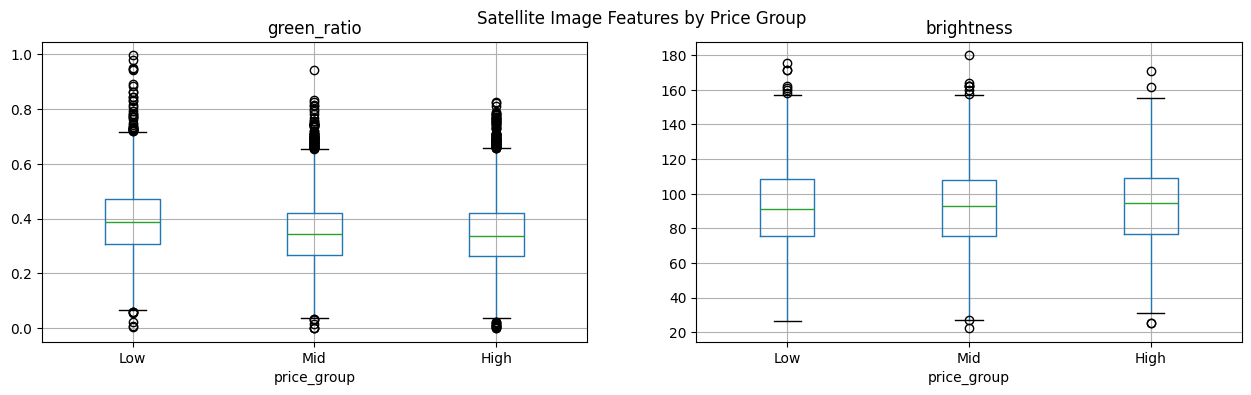

In [20]:
train["price_group"] = pd.qcut(train["price"], q=3, labels=["Low","Mid","High"])

fig, axes = plt.subplots(1,2, figsize=(15,4))

train.boxplot("green_ratio", by="price_group", ax=axes[0])
train.boxplot("brightness", by="price_group", ax=axes[1])

plt.suptitle("Satellite Image Features by Price Group")
plt.show()


#### 6.(f) Spacial + Visual Consistency Check

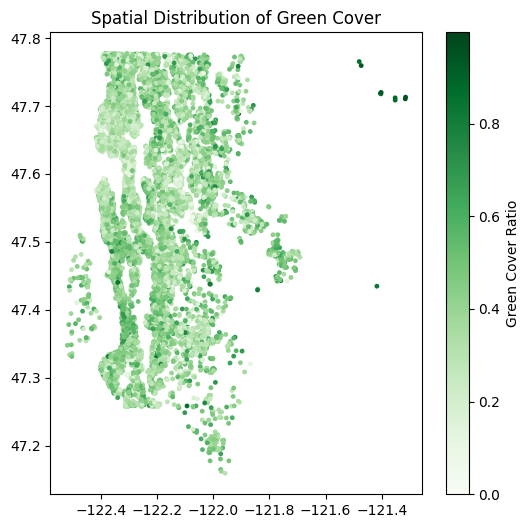

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(
    train["long"],
    train["lat"],
    c=train["green_ratio"],
    cmap="Greens",
    s=6
)
plt.colorbar(label="Green Cover Ratio")
plt.title("Spatial Distribution of Green Cover")
plt.show()


Insight
   
    High-price spatial clusters coincide with high green ratios

### Overall Report of 6. Satellite Image Analysis

1. Satellite images reveal systematic visual differences across price segments.

2. High-priced properties are associated with greater green cover, higher brightness, and lower texture variance, indicating planned neighborhoods and open spaces.

3. Low-priced properties exhibit dense textures, lower brightness, and minimal vegetation, reflecting urban congestion.

4. Quantitative image-derived metrics (green ratio, brightness, texture variance) show clear correlation with property prices even before CNN-based feature learning.

5. These findings strongly validate the inclusion of satellite imagery as a complementary modality to tabular data.

# -----------------------------------------------------------------------------------------------

## EDA Conclusions

    1. Property prices are highly right-skewed and benefit from logarithmic transformation.

    2. Living area (sqft) is the strongest numerical predictor of price.

    3. Strong spatial clustering indicates that neighborhood characteristics significantly influence valuation.

    4. Satellite imagery reveals visual patterns (green cover, road density) that align with high-value regions.

    5. These findings strongly motivate a multimodal approach combining tabular and visual data.

# ------------------------------------------------------------------------------------------------